### HANDLING IMBALANCED DATASET

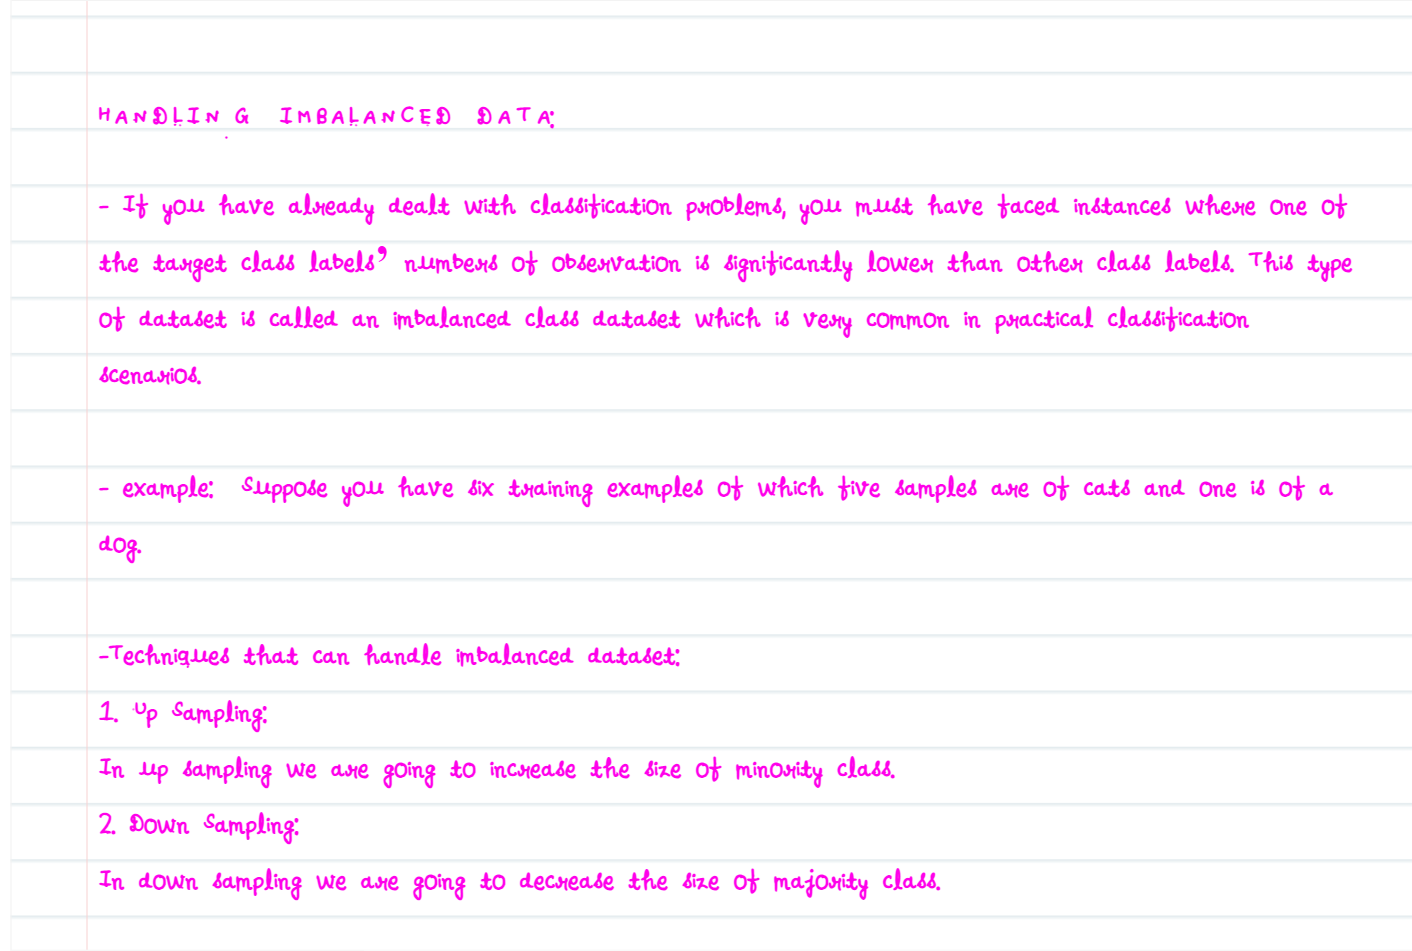

In [9]:
# importing lib 
import pandas as pd
import numpy as np

In [11]:
# set the random seed for reproducibility
np.random.seed(123)

# create dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0

In [12]:
n_class_0, n_class_1

(900, 100)

We can see now we have imbalance data.

In [20]:
# create dataframe of imbalanced data that we created above
class_0 = pd.DataFrame({
                        'feature_1':np.random.normal(loc=0,scale=1,size=n_class_0),
                        'feature_2':np.random.normal(loc=0,scale=1,size=n_class_0),
                        'target':[0]*n_class_0})

class_1 = pd.DataFrame({
                        'feature_1':np.random.normal(loc=2,scale=1,size=n_class_1),
                        'feature_2':np.random.normal(loc=2,scale=1,size=n_class_1),
                        'target':[1]*n_class_1})
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [21]:
# read data 
df.head()

,feature_1,feature_2,target
0,0.490810,0.657563,0
1,-0.153131,0.163449,0
2,0.380915,1.504734,0
3,0.294672,-0.556732,0
4,1.070848,0.688279,0


In [22]:
# value count
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

#### 1. Up Sampling

In [23]:
# segragate the minor and major class
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [26]:
# check shape
df_minority.shape

(100, 3)

In [29]:
# import lib
from sklearn.utils import resample
# upsampling
minor_upsample = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [31]:
# check shape
minor_upsample.shape

(900, 3)

In [32]:
df_upsample = pd.concat([df_majority,minor_upsample])

In [34]:
df_upsample['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

We can see our imbalanced data is balanced now.

### 2. Down Sampling

In [42]:
# downsampling
major_downsample = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)
# check for shape of downsampled data
major_downsample.shape

(100, 3)

In [43]:
df_downsample = pd.concat([df_minority,major_downsample])

In [44]:
# check shape for shape
df_downsample['target'].value_counts()

1    100
0    100
Name: target, dtype: int64